In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,        # Normalisasi pixel ke [0, 1]
    shear_range = 0.2,        # Transformasi geser
    zoom_range = 0.2,         # Zoom
    horizontal_flip = True    # Membalik gambar secara horizontal
)

# Data pelatihan dari direktori
training_set = train_datagen.flow_from_directory(
    'training_set',        # Path direktori data pelatihan
    target_size = (64,64), # Ukuran gambar setelah diubah
    batch_size = 64,          # Jumlah sampel per batch
    class_mode = 'categorical' # Tipe label (binary/categorical)
)


Found 22534 images belonging to 2 classes.


In [48]:
test_datagen = ImageDataGenerator (
    rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'test_set',         # Path direktori data test
    target_size = (64,64), # Ukuran gambar setelah diubah
    batch_size = 64,          # Jumlah sampel per batch
    class_mode = 'categorical' # Tipe label (binary/categorical)
)

Found 2513 images belonging to 2 classes.


In [49]:
cnn = tf.keras.models.Sequential()

In [50]:
cnn.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = 3,
    activation = 'relu',
    input_shape = [64, 64, 3]
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2,
    strides = 2 
))

In [51]:
cnn.add(tf.keras.layers.Conv2D(
    filters = 64,
    kernel_size = 3,
    activation = 'relu'
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size = 2,
    strides = 2 
))

In [55]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [59]:
cnn.add(tf.keras.layers.Flatten())

In [61]:
cnn.add(tf.keras.layers.Dense(
    units = 128,
    activation = 'relu'
))

In [63]:
cnn.add(tf.keras.layers.Dense(
    units = 2,
    activation = 'softmax'
))

In [65]:
cnn.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 73s 204ms/step - accuracy: 0.7530 - loss: 0.5055 - val_accuracy: 0.8496 - val_loss: 0.3961
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 72s 203ms/step - accuracy: 0.8277 - loss: 0.3967 - val_accuracy: 0.8747 - val_loss: 0.3204
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 69s 195ms/step - accuracy: 0.8358 - loss: 0.3825 - val_accuracy: 0.8719 - val_loss: 0.3191
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 69s 197ms/step - accuracy: 0.8428 - loss: 0.3624 - val_accuracy: 0.8818 - val_loss: 0.3147
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 71s 201ms/step - accuracy: 0.8541 - loss: 0.3492 - val_accuracy: 0.8520 - val_loss: 0.3527
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 69s 194ms/step - accuracy: 0.8558 - loss: 0.3353 - val_accuracy: 0.8814 - val_loss: 0.2971
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 67s 189ms/step - accuracy: 0.8564 - loss: 0.3362 - val_accuracy: 0.8926 - val_loss: 0.2976
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 66s 186ms/step - accuracy: 0.8645 - loss: 0

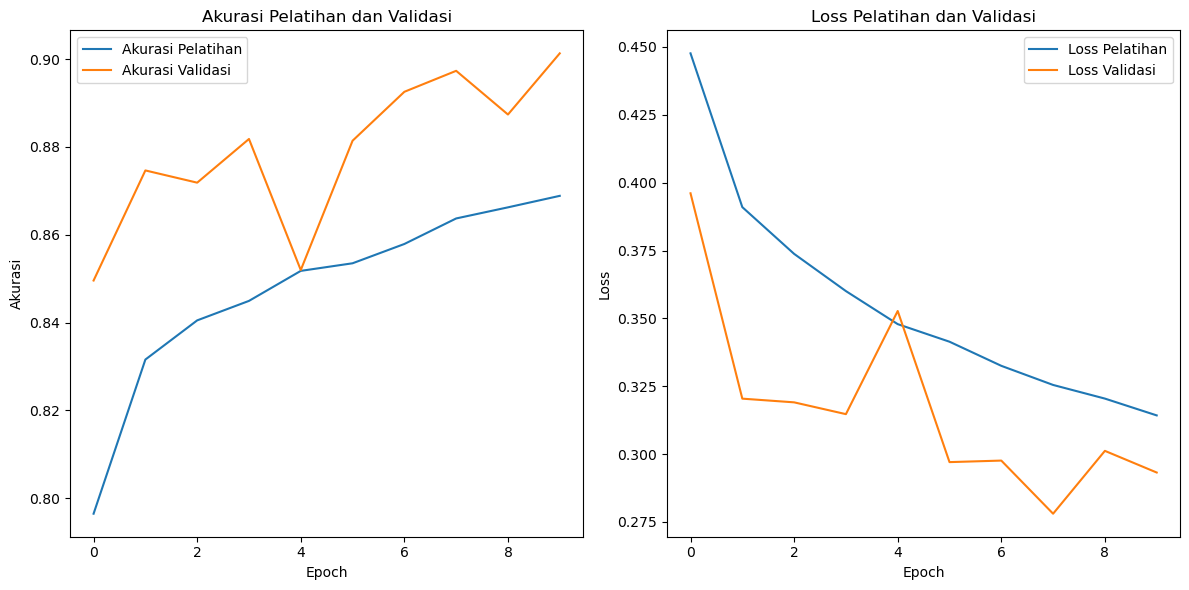

Final Training Accuracy: 86.89%
Final Training Loss: 0.3143
Final Validation Accuracy: 90.13%
Final Validation Loss: 0.2932


In [67]:
import matplotlib.pyplot as plt

# Melatih model
test_result = cnn.fit(
    x = training_set,
    validation_data = test_set,
    epochs = 10
)

cnn.save('model_cnn.h5');

# Menampilkan grafik akurasi
plt.figure(figsize=(12, 6))

# Grafik Akurasi Pelatihan
plt.subplot(1, 2, 1)
plt.plot(test_result.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(test_result.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss Pelatihan
plt.subplot(1, 2, 2)
plt.plot(test_result.history['loss'], label='Loss Pelatihan')
plt.plot(test_result.history['val_loss'], label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Mencetak persentase akurasi dan loss terakhir
final_accuracy = test_result.history['accuracy'][-1] * 100
final_loss = test_result.history['loss'][-1]
final_val_accuracy = test_result.history['val_accuracy'][-1] * 100
final_val_loss = test_result.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_accuracy:.2f}%")
print(f"Final Training Loss: {final_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")
print(f"Final Validation Loss: {final_val_loss:.4f}")


In [73]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
from tensorflow.keras.preprocessing import image

# Open the file explorer to let the user select an image file
file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])

# Check if a file was selected
if file_path:
    # Load the image and resize it to the expected size (64x64)
    test_image = image.load_img(file_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Normalize the image
    test_image = test_image / 255.0

    # Predict the class of the image
    result = cnn.predict(test_image)
    
    # Get the class with the highest probability
    class_names = list(training_set.class_indices.keys())  # Getting the class names from the training set
    predicted_class_index = np.argmax(result)
    predicted_class = class_names[predicted_class_index]

    # Output the result
    print(f"The selected image is predicted to belong to class: {predicted_class}")
else:
    print("No file was selected.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The selected image is predicted to belong to class: organic
